In [77]:
import pandas as pd

In [78]:
df = pd.read_csv('/content/Customer-Churn-Records.csv')

In [79]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   RowNumber           10000 non-null  int64  
 1   CustomerId          10000 non-null  int64  
 2   Surname             10000 non-null  object 
 3   CreditScore         10000 non-null  int64  
 4   Geography           10000 non-null  object 
 5   Gender              10000 non-null  object 
 6   Age                 10000 non-null  int64  
 7   Tenure              10000 non-null  int64  
 8   Balance             10000 non-null  float64
 9   NumOfProducts       10000 non-null  int64  
 10  HasCrCard           10000 non-null  int64  
 11  IsActiveMember      10000 non-null  int64  
 12  EstimatedSalary     10000 non-null  float64
 13  Exited              10000 non-null  int64  
 14  Complain            10000 non-null  int64  
 15  Satisfaction Score  10000 non-null  int64  
 16  Card 

# Tratar Nulos e Duplicados

In [80]:
# Tratar valores nulos
# Remover linhas com valores nulos
df.dropna(inplace=True)

# Tratar duplicados
# Remover linhas duplicadas
df.drop_duplicates(inplace=True)

# Tratar Outliers

In [81]:
def tratar_outliers(df, Exited):
    # Seleciona todas as colunas numéricas, exceto a coluna a ser excluída
    cols = df.select_dtypes(include=['number']).columns.tolist()
    cols.remove(Exited)

    for col in cols:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1

        # Remoção de outliers
        df = df[~((df[col] < (Q1 - 1.5 * IQR)) | (df[col] > (Q3 + 1.5 * IQR)))]

        # Substituição de outliers pela mediana
        mediana = df[col].median()
        df[col] = df[col].apply(lambda x: mediana if x < (Q1 - 1.5 * IQR) or x > (Q3 + 1.5 * IQR) else x)

    return df

# Exemplo de uso
# df = pd.read_csv('seu_arquivo.csv')
# exclude_col = 'coluna_excluida'
# df_tratado = tratar_outliers(df, exclude_col)


In [82]:
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0,0,1,DIAMOND,300
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0,0,5,PLATINUM,771
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1,1,3,SILVER,564
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1,1,2,GOLD,339


# Verificar Correlações

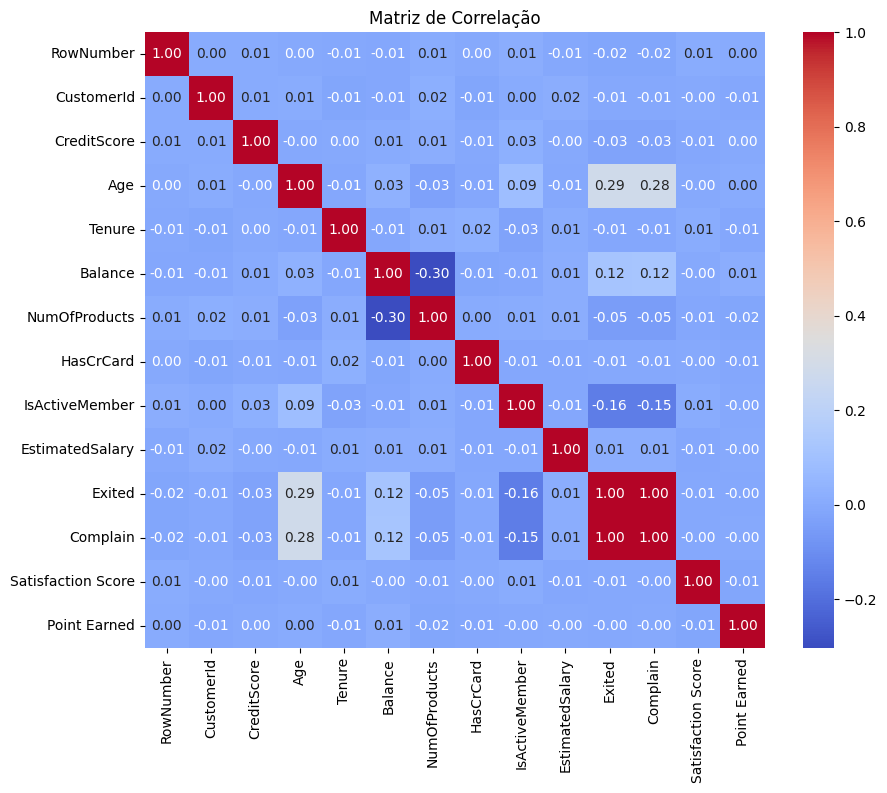

In [83]:
import seaborn as sns
import matplotlib.pyplot as plt

# Selecionar colunas numéricas para calcular correlações
numeric_cols = df.select_dtypes(include=['number']).columns.tolist()

# Calcular correlações
correlations = df[numeric_cols].corr()

# Visualizar a matriz de correlação usando um heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlations, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matriz de Correlação')
plt.show()

In [84]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, OneHotEncoder

# 1. Codificação One-Hot para features categóricas:
features_categoricas = ['Geography', 'Gender', 'Card Type']
df_codificado = pd.get_dummies(df, columns=features_categoricas, drop_first=True, prefix_sep='_', dummy_na=False)
# dummy_na=False para evitar a criação de colunas para valores ausentes


# 2. Padronização de features numéricas:
features_numericas = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary', 'Point Earned', 'Satisfaction Score']
escalonador = StandardScaler()
df_codificado[features_numericas] = escalonador.fit_transform(df_codificado[features_numericas])


# 3. Criação de novas features:
df_codificado['Interacao_Tempo_Saldo'] = df_codificado['Tenure'] * df_codificado['Balance'] # Interação entre tempo como cliente e saldo
df_codificado['Engajamento_Cliente'] = df_codificado['IsActiveMember'] * df_codificado['NumOfProducts'] # Engajamento do cliente


# 4. Padronização das novas features:
novas_features = ['Interacao_Tempo_Saldo', 'Engajamento_Cliente']
df_codificado[novas_features] = escalonador.fit_transform(df_codificado[novas_features])


# 5. Criando uma cópia do DataFrame:
df_preparado = df_codificado.copy()


# Exibindo o DataFrame preparado:
display(df_preparado.head())

,RowNumber,CustomerId,Surname,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,...,Satisfaction Score,Point Earned,Geography_Germany,Geography_Spain,Gender_Male,Card Type_GOLD,Card Type_PLATINUM,Card Type_SILVER,Interacao_Tempo_Saldo,Engajamento_Cliente
0,1,15634602,Hargrave,-0.326221,0.293517,-1.041760,-1.225848,-0.911583,1,1,...,-0.721130,-0.630839,False,False,False,False,False,False,1.298049,-1.299875
1,2,15647311,Hill,-0.440036,0.198164,-1.387538,0.117350,-0.911583,0,1,...,-0.009816,-0.666251,False,True,False,False,False,False,-0.151596,-1.299875
2,3,15619304,Onio,-1.536794,0.293517,1.032908,1.333053,2.527057,1,0,...,-0.009816,-1.015942,False,False,False,False,False,False,1.398610,-0.006814
3,4,15701354,Boni,0.501521,0.007457,-1.387538,-1.225848,0.807737,0,0,...,1.412812,-1.135457,False,False,False,True,False,False,1.724799,-0.006814
4,5,15737888,Mitchell,2.063884,0.388871,-1.041760,0.785728,-0.911583,1,1,...,1.412812,-0.803472,False,True,False,True,False,False,-0.811762,-1.299875


<ipython-input-85-6792c65a1660>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=correlations.values, y=correlations.index, palette="viridis")


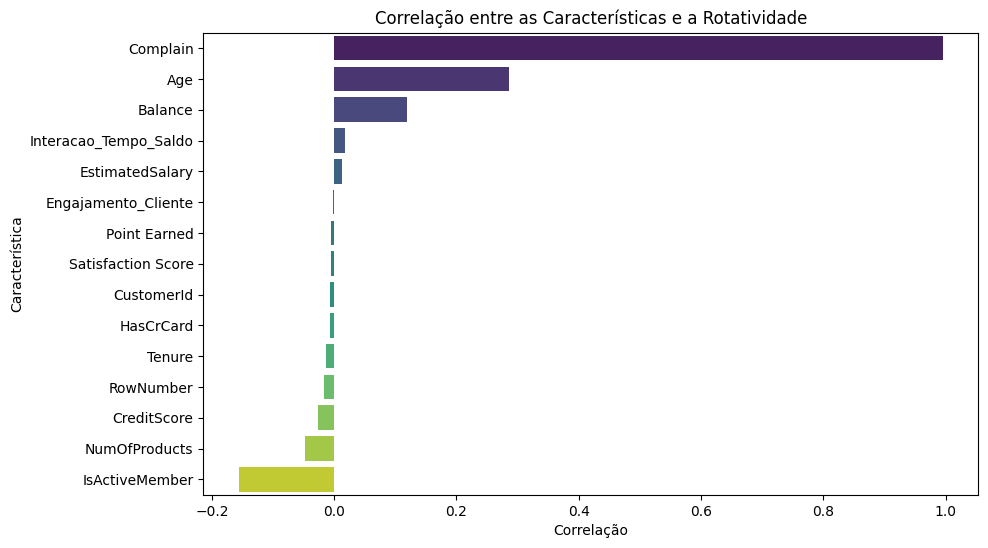

In [85]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# 3. Visualização da Correlação
plt.figure(figsize=(10, 6))
# Replace df_churn_preparado with df_preparado

# Select only numeric columns for correlation
numeric_df = df_preparado.select_dtypes(include=['number'])

correlations = numeric_df.corr()['Exited'].drop('Exited').sort_values(ascending=False)
sns.barplot(x=correlations.values, y=correlations.index, palette="viridis")
plt.xlabel('Correlação')
plt.ylabel('Característica')
plt.title('Correlação entre as Características e a Rotatividade')
plt.savefig('correlacao_rotatividade.png')  # Salvar com nome em português
plt.show()

A variável 'Complain' apresenta uma correlação extremamente alta com a rotatividade. 'Age' e 'Balance' também mostram correlações positivas. As novas características, 'TenureBalanceInteraction' e 'CustomerEngagement', mostram correlações fracas com a rotatividade.

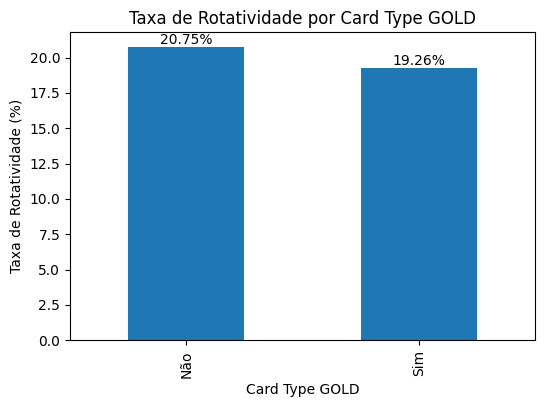

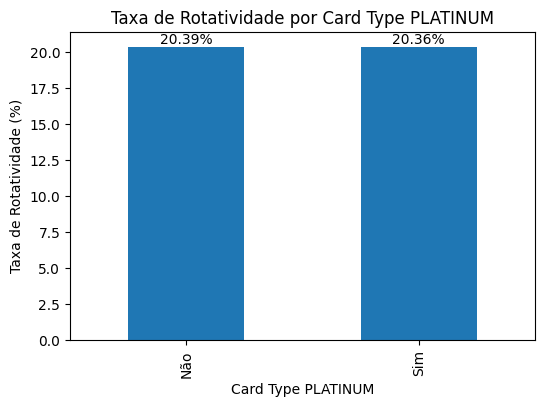

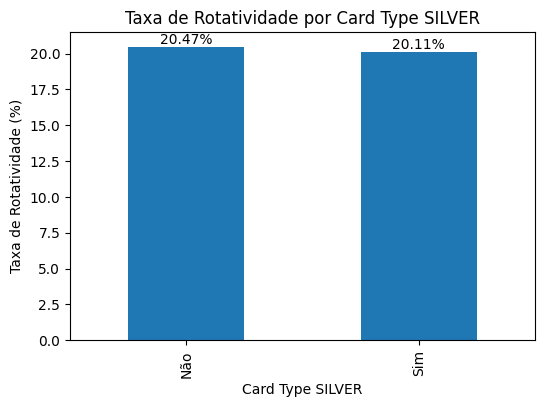

In [87]:
# 4. Distribuição da Rotatividade Demográfica
demographic_cols = ['Card Type_GOLD', 'Card Type_PLATINUM', 'Card Type_SILVER']
for col in demographic_cols:
    plt.figure(figsize=(6, 4))
    # Replace df_churn_preparado with df_preparado
    churn_rates = df_preparado.groupby(col)['Exited'].mean() * 100
    bar_plot = churn_rates.plot(kind='bar')
    plt.ylabel('Taxa de Rotatividade (%)')
    plt.title(f'Taxa de Rotatividade por {col.replace("_", " ")}')

    # Adicionar rótulos de dados e customizar eixo x
    for bar in bar_plot.patches:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width() / 2, height, f'{height:.2f}%', ha='center', va='bottom')

    # Customizar eixo x (substituir 0 e 1 por nomes)
    plt.xticks([0, 1], ['Não', 'Sim'])  # Rótulos genéricos para colunas dummy
    plt.xlabel(col.replace("_", " "))
    plt.savefig(f'rotatividade_por_{col.lower().replace(" ", "_")}.png')  # Salvar com nome em português
    plt.show()

# 1.Qual é a taxa de churn ?

In [88]:
import matplotlib.pyplot as plt

Taxa de Churn: 20.38%


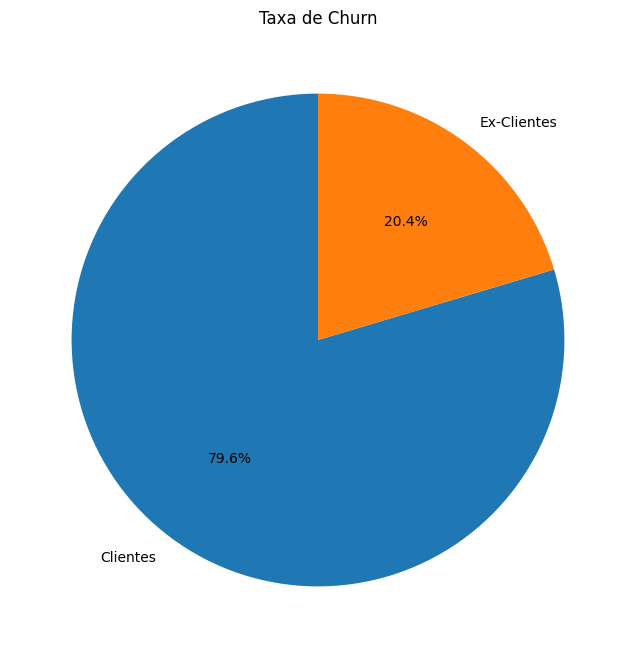

In [89]:
# Calcular a taxa de churn
churn_rate = df['Exited'].value_counts(normalize=True) * 100
print(f"Taxa de Churn: {churn_rate[1]:.2f}%")

# Criar o gráfico de pizza
plt.figure(figsize=(8, 8))
plt.pie(churn_rate, labels=['Clientes', 'Ex-Clientes'], autopct='%1.1f%%', startangle=90)
plt.title('Taxa de Churn')
plt.show()

In [90]:
# Filtrar os clientes que cancelaram
churned_customers = df[df['Exited'] == 1]

# Calcular o tempo médio de permanência
average_tenure_churned = churned_customers['Tenure'].mean()
print(f"Tempo médio de permanência dos clientes que cancelaram: {average_tenure_churned:.2f} anos")

Tempo médio de permanência dos clientes que cancelaram: 4.93 anos


# 2. Existe um perfil típico de clientes que cancelaram suas contas?

## Gênero

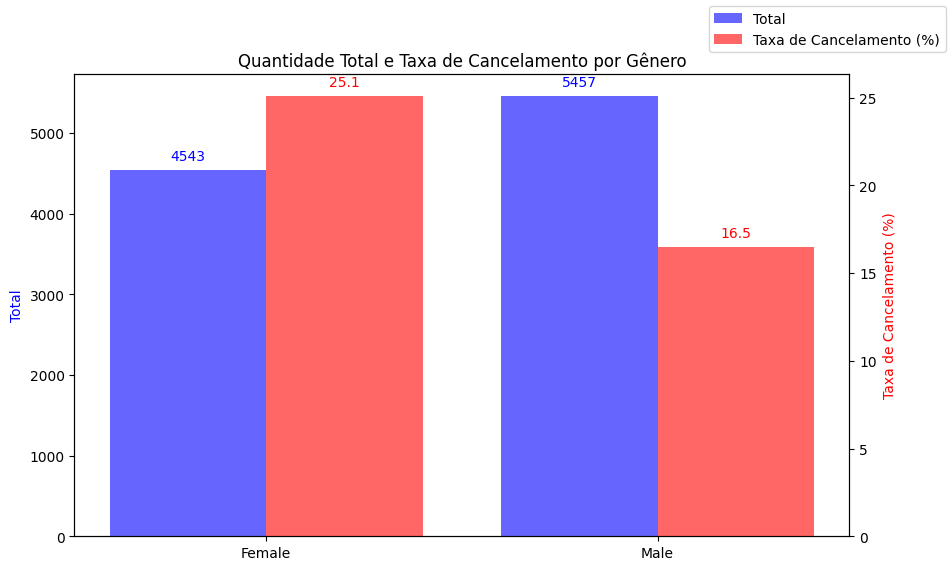

In [91]:
# Calcular a quantidade total de homens e mulheres
gender_counts = df['Gender'].value_counts()

# Calcular a taxa de churn por gênero
churn_rate_by_gender = df.groupby('Gender')['Exited'].mean()

# Criar um DataFrame para os dados do gráfico
data = pd.DataFrame({
    'Total': gender_counts,
    'Taxa de Cancelamento': churn_rate_by_gender * 100  # Converter para porcentagem
}).reset_index()

# Renomear colunas
data.columns = ['Gender', 'Total', 'Taxa de Cancelamento']

# Criar o gráfico de barras duplas
fig, ax1 = plt.subplots(figsize=(10, 6))

# Gráfico de barras para a quantidade total
bar_width = 0.4
index = data.index

bar1 = ax1.bar(index - bar_width/2, data['Total'], bar_width, label='Total', color='b', alpha=0.6)
ax1.set_ylabel('Total', color='b')
ax1.set_title('Quantidade Total e Taxa de Cancelamento por Gênero')
ax1.set_xticks(index)
ax1.set_xticklabels(data['Gender'])

# Adicionar rótulos de dados para a quantidade total
for p in bar1:
    height = p.get_height()
    ax1.annotate(format(height, '.0f'),
                 (p.get_x() + p.get_width() / 2., height),
                 ha = 'center', va = 'center',
                 xytext = (0, 10),
                 textcoords = 'offset points',
                 color='b')

# Criar um segundo eixo y para a taxa de cancelamento
ax2 = ax1.twinx()
bar2 = ax2.bar(index + bar_width/2, data['Taxa de Cancelamento'], bar_width, label='Taxa de Cancelamento (%)', color='r', alpha=0.6)
ax2.set_ylabel('Taxa de Cancelamento (%)', color='r')

# Adicionar rótulos de dados para a taxa de cancelamento
for p in bar2:
    height = p.get_height()
    ax2.annotate(format(height, '.1f'),
                 (p.get_x() + p.get_width() / 2., height),
                 ha = 'center', va = 'center',
                 xytext = (0, 10),
                 textcoords = 'offset points',
                 color='r')

# Adicionar legenda
fig.legend(loc='upper right')

plt.show()


## Idade

<ipython-input-92-2fd279332950>:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  churn_rate_by_age_group = df.groupby('AgeGroup')['Exited'].mean() * 100


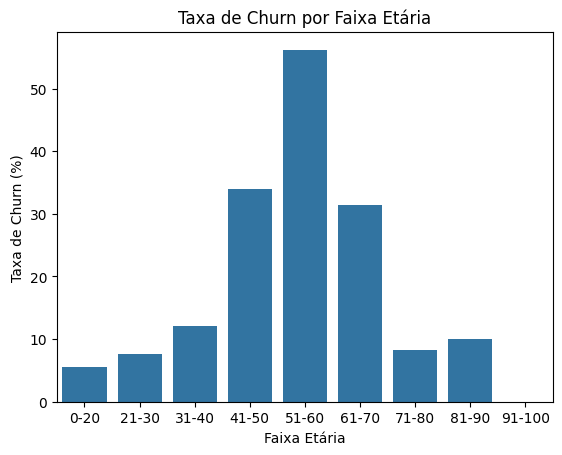

In [92]:
# Agrupar por faixa etária
df['AgeGroup'] = pd.cut(df['Age'], bins=[0, 20, 30, 40, 50, 60, 70, 80, 90, 100], labels=['0-20', '21-30', '31-40', '41-50', '51-60', '61-70', '71-80', '81-90', '91-100'])
churn_rate_by_age_group = df.groupby('AgeGroup')['Exited'].mean() * 100

sns.barplot(x=churn_rate_by_age_group.index, y=churn_rate_by_age_group.values)
plt.xlabel('Faixa Etária')
plt.ylabel('Taxa de Churn (%)')
plt.title('Taxa de Churn por Faixa Etária')
plt.show()


Há uma correlação positiva moderada (0.3124) entre a idade e o churn, o que sugere que clientes mais velhos tendem a cancelar o serviço com mais frequência. Existe uma taxa de cancelamento maior entre 41 e 70 anos, sendo a maior concentração entre 51 e 60.

## Renda

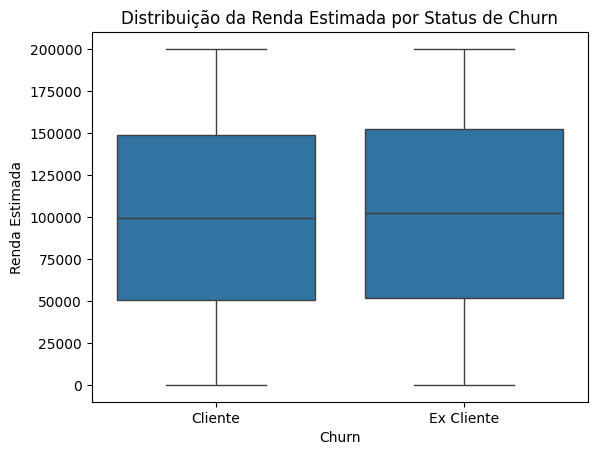

In [135]:
sns.boxplot(x='Exited', y='EstimatedSalary', data=df)
plt.xlabel('Churn')
plt.ylabel('Renda Estimada')
plt.title('Distribuição da Renda Estimada por Status de Churn')

# Adicionar rótulos personalizados no eixo x
plt.xticks([0, 1], ['Cliente', 'Ex Cliente'])

plt.show()



<ipython-input-138-518d4654f7f2>:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  churn_rate_by_income_group = df.groupby('IncomeGroup')['Exited'].mean() * 100


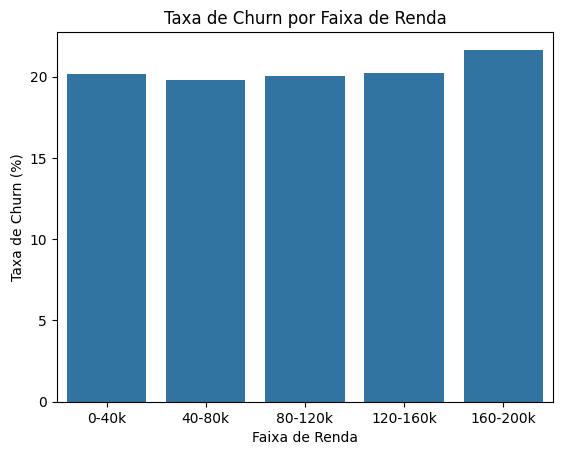

In [138]:
# Suponha que df seja o seu DataFrame
df['IncomeGroup'] = pd.cut(df['EstimatedSalary'], bins=[0, 40000, 80000, 120000, 160000, 200000], labels=['0-40k', '40-80k', '80-120k', '120-160k', '160-200k'])
churn_rate_by_income_group = df.groupby('IncomeGroup')['Exited'].mean() * 100

sns.barplot(x=churn_rate_by_income_group.index, y=churn_rate_by_income_group.values)
plt.xlabel('Faixa de Renda')
plt.ylabel('Taxa de Churn (%)')
plt.title('Taxa de Churn por Faixa de Renda')
plt.show()



# Balance (Rotatividade)

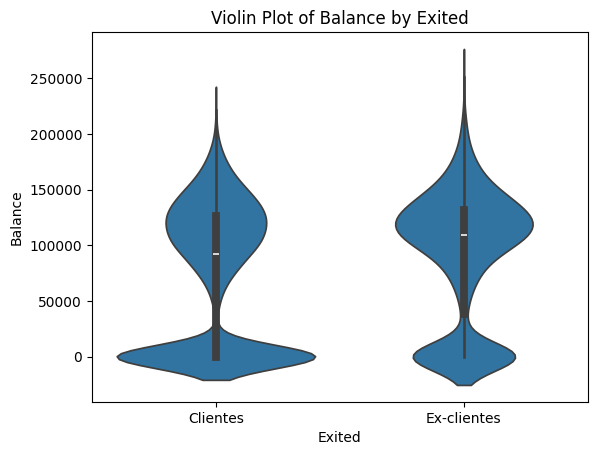

In [107]:
sns.violinplot(x='Exited', y='Balance', data=df)
plt.title('Violin Plot of Balance by Exited')
plt.xticks([0, 1], ['Clientes', 'Ex-clientes'])
plt.show()


O violino para Ex-clientes é mais largo na parte superior e mais estreito na parte inferior, em comparação com o violino para Clientes, isso pode indicar que os clientes com saldos mais altos têm maior probabilidade de cancelar.

# Reclamações (Complain)

In [99]:
churn_rate_complain = df.groupby(['Complain'])['Exited'].mean().reset_index()

In [100]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calcular a taxa de churn por Complain
churn_rate_complain = df.groupby(['Complain'])['Exited'].mean().reset_index()

correlation = df['Complain'].corr(df['Exited'])
print(f"Correlação entre Complain e Exited: {correlation:.4f}")

Correlação entre Complain e Exited: 0.9957


Número de pessoas que deixaram o banco com reclamação: 2034
Número de pessoas que deixaram o banco sem reclamação: 4


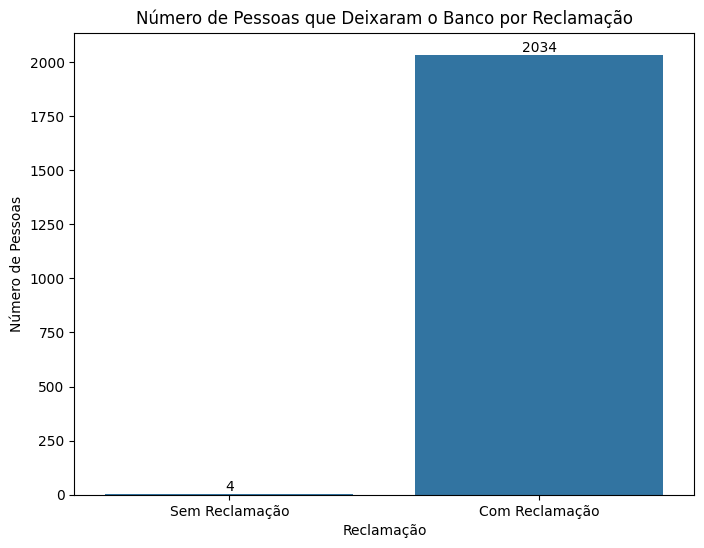

In [101]:
import pandas as pd

# Assuming your DataFrame is named 'df' and contains columns 'Exited' and 'Complain'

# Pessoas que deixaram o banco (Exited = 1)
left_bank = df[df['Exited'] == 1]

# Pessoas que deixaram o banco e reclamaram (Complain = 1)
left_with_complaint = left_bank[left_bank['Complain'] == 1]

# Pessoas que deixaram o banco e não reclamaram (Complain = 0)
left_without_complaint = left_bank[left_bank['Complain'] == 0]

# Obter as contagens
num_left_with_complaint = len(left_with_complaint)
num_left_without_complaint = len(left_without_complaint)

# Imprimir as contagens em português
print(f"Número de pessoas que deixaram o banco com reclamação: {num_left_with_complaint}")
print(f"Número de pessoas que deixaram o banco sem reclamação: {num_left_without_complaint}")

# Criar o gráfico de barras
plt.figure(figsize=(8, 6))
sns.countplot(data=left_bank, x='Complain')
plt.title('Número de Pessoas que Deixaram o Banco por Reclamação')
plt.xlabel('Reclamação')
plt.ylabel('Número de Pessoas')
plt.xticks([0, 1], ['Sem Reclamação', 'Com Reclamação'])  # Customizar os rótulos do eixo x

# Adicionar os valores acima das barras
plt.bar_label(plt.gca().containers[0], fmt='%d', label_type='edge')  # label_type='edge' para colocar os valores acima das barras

plt.show()

Alta correlação entre reclamações e rotatividade: A variável "Complain" apresenta uma correlação extremamente alta (0.9957) com a rotatividade, indicando uma forte relação entre reclamações de clientes e a probabilidade de cancelamento.

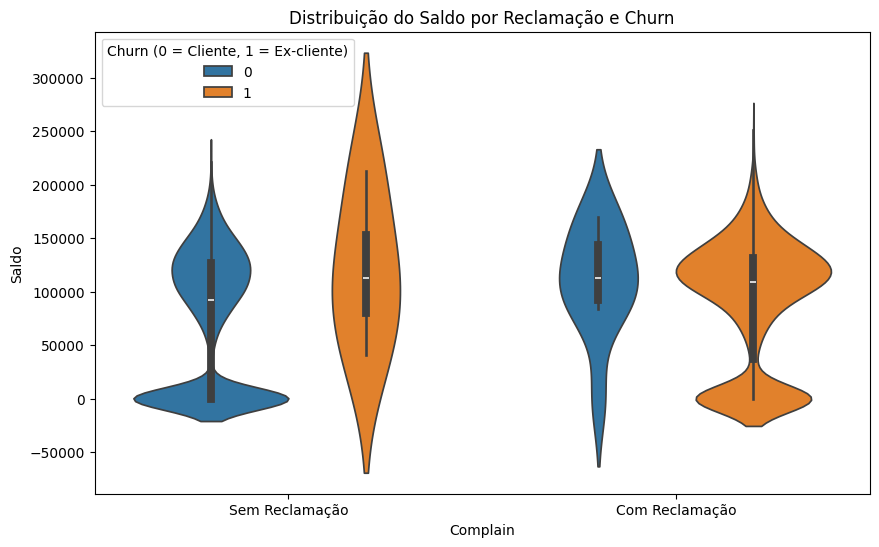

In [114]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.violinplot(x='Complain', y='Balance', hue='Exited', data=df)
plt.title('Distribuição do Saldo por Reclamação e Churn')
plt.ylabel('Saldo')
plt.legend(title='Churn (0 = Cliente, 1 = Ex-cliente)')
plt.xticks([0, 1], ['Sem Reclamação', 'Com Reclamação'])
plt.show()

## Localização

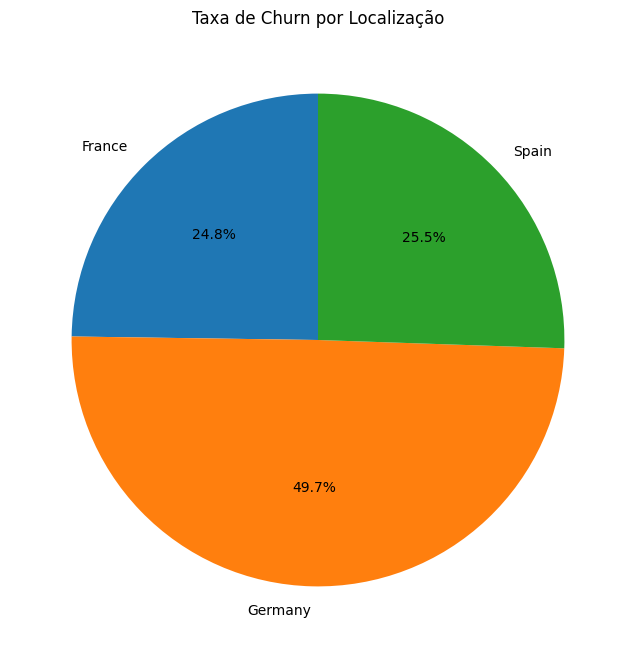

In [104]:
import matplotlib.pyplot as plt

# Calcular a taxa de churn por localização
churn_rate_by_location = df.groupby('Geography')['Exited'].mean()

# Criar o gráfico de pizza
plt.figure(figsize=(8, 8))
plt.pie(churn_rate_by_location, labels=churn_rate_by_location.index, autopct='%1.1f%%', startangle=90)
plt.title('Taxa de Churn por Localização')
plt.show()

## Perfil de Clientes


Definir uma função para traçar o perfil do cliente.

In [115]:
def tracar_perfil_cliente(df):
    perfil = {}

    # Dados Demográficos
    perfil['Idade Média'] = df['Age'].mean()
    perfil['Gênero'] = df['Gender'].mode()[0]  # Moda para gênero
    perfil['Geografia'] = df['Geography'].mode()[0] # Moda para geografia

    # Comportamento
    perfil['Número Médio de Produtos'] = df['NumOfProducts'].mean()
    perfil['Saldo Médio'] = df['Balance'].mean()
    perfil['Salário Estimado Médio'] = df['EstimatedSalary'].mean()
    perfil['Pontuação Média de Satisfação'] = df['Satisfaction Score'].mean()
    perfil['Pontos Médios Ganhos'] = df['Point Earned'].mean()

    # Status
    perfil['Percentual com Cartão de Crédito'] = (df['HasCrCard'].sum() / len(df)) * 100
    perfil['Percentual de Membros Ativos'] = (df['IsActiveMember'].sum() / len(df)) * 100
    perfil['Taxa de Churn'] = (df['Exited'].sum() / len(df)) * 100

    return perfil

Chamar a função

In [116]:
perfil_cliente = tracar_perfil_cliente(df)
print(perfil_cliente)

{'Idade Média': np.float64(38.9218), 'Gênero': 'Male', 'Geografia': 'France', 'Número Médio de Produtos': np.float64(1.5302), 'Saldo Médio': np.float64(76485.889288), 'Salário Estimado Médio': np.float64(100090.239881), 'Pontuação Média de Satisfação': np.float64(3.0138), 'Pontos Médios Ganhos': np.float64(606.5151), 'Percentual com Cartão de Crédito': np.float64(70.55), 'Percentual de Membros Ativos': np.float64(51.51), 'Taxa de Churn': np.float64(20.380000000000003)}


Segmentar os clientes em grupos.

In [117]:
# Segmentar por idade
clientes_jovens = df[df['Age'] < 30]
perfil_jovens = tracar_perfil_cliente(clientes_jovens)
print("Perfil de Clientes Jovens:", perfil_jovens)

clientes_maduros = df[df['Age'] >= 30]
perfil_maduros = tracar_perfil_cliente(clientes_maduros)
print("Perfil de Clientes Maduros:", perfil_maduros)

Perfil de Clientes Jovens: {'Idade Média': np.float64(25.925655088360756), 'Gênero': 'Male', 'Geografia': 'France', 'Número Médio de Produtos': np.float64(1.5569774527726996), 'Saldo Médio': np.float64(73698.71863497868), 'Salário Estimado Médio': np.float64(100855.24781840341), 'Pontuação Média de Satisfação': np.float64(3.045703839122486), 'Pontos Médios Ganhos': np.float64(607.855575868373), 'Percentual com Cartão de Crédito': np.float64(71.41986593540524), 'Percentual de Membros Ativos': np.float64(51.005484460694696), 'Taxa de Churn': np.float64(7.556368068251067)}
Perfil de Clientes Maduros: {'Idade Média': np.float64(41.4731427204211), 'Gênero': 'Male', 'Geografia': 'France', 'Número Médio de Produtos': np.float64(1.5249431750209355), 'Saldo Médio': np.float64(77033.05366670655), 'Salário Estimado Médio': np.float64(99940.05708099055), 'Pontuação Média de Satisfação': np.float64(3.0075367866969733), 'Pontos Médios Ganhos': np.float64(606.2519440124416), 'Percentual com Cartão de

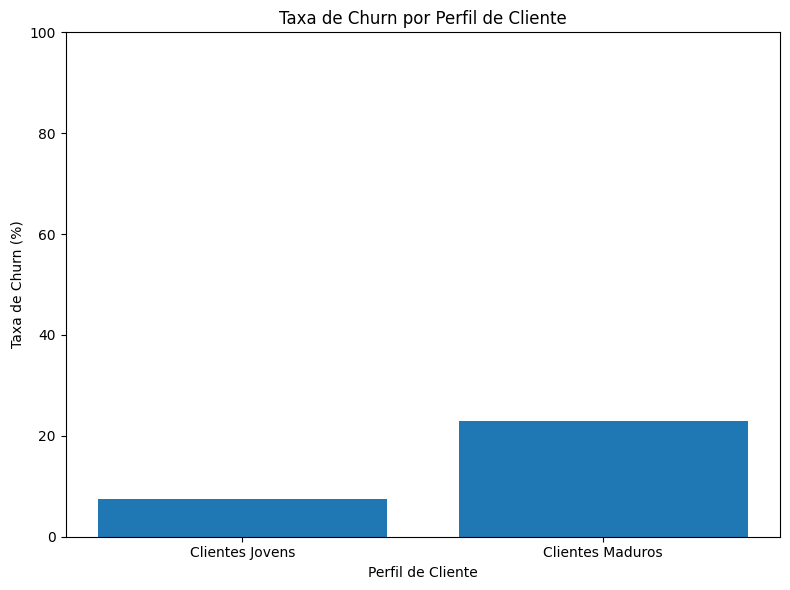

In [118]:
import matplotlib.pyplot as plt

# Calcular a taxa de churn para cada perfil
churn_rate_jovens = perfil_jovens['Taxa de Churn']
churn_rate_maduros = perfil_maduros['Taxa de Churn']

# Criar o gráfico de barras
perfis = ['Clientes Jovens', 'Clientes Maduros']
taxas_churn = [churn_rate_jovens, churn_rate_maduros]

plt.figure(figsize=(8, 6))
plt.bar(perfis, taxas_churn)
plt.title('Taxa de Churn por Perfil de Cliente')
plt.xlabel('Perfil de Cliente')
plt.ylabel('Taxa de Churn (%)')
plt.ylim(0, 100)  # Definir limites do eixo y para melhor visualização
plt.tight_layout()
plt.show()

In [120]:
# Calcular a correlação entre as variáveis de engajamento e Exited
engagement_vars = ['IsActiveMember', 'NumOfProducts', 'Tenure', 'Point Earned','Satisfaction Score']
correlations = df[engagement_vars + ['Exited']].corr()['Exited'].drop('Exited')

print(correlations)

IsActiveMember       -0.156356
NumOfProducts        -0.047611
Tenure               -0.013656
Point Earned         -0.004628
Satisfaction Score   -0.005849
Name: Exited, dtype: float64


Correlação entre as variáveis de engajamento e a variável Exited. Uma correlação negativa indica que clientes mais engajados tendem a ter menor taxa de churn, enquanto uma correlação positiva indica o contrário

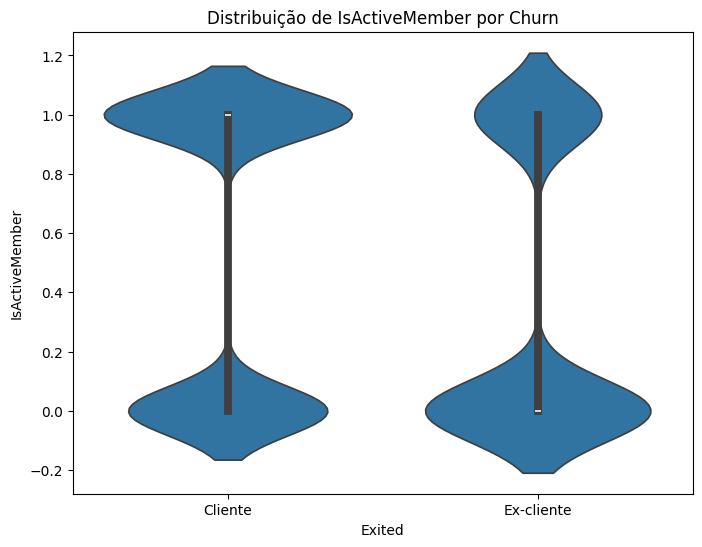

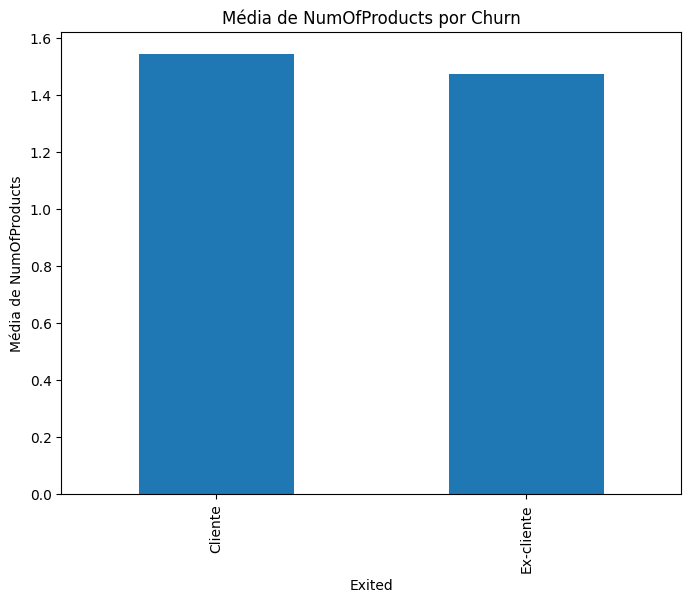

In [141]:
import matplotlib.pyplot as plt
import seaborn as sns

# Criar um gráfico de violino para comparar a distribuição de IsActiveMember para clientes que cancelaram e clientes que não cancelaram
plt.figure(figsize=(8, 6))
sns.violinplot(x='Exited', y='IsActiveMember', data=df)
plt.title('Distribuição de IsActiveMember por Churn')
plt.ylabel('IsActiveMember')
plt.xticks([0, 1], ['Cliente', 'Ex-cliente'])
plt.show()

# Criar um gráfico de barras para comparar a média de NumOfProducts para clientes que cancelaram e clientes que não cancelaram
plt.figure(figsize=(8, 6))
df.groupby('Exited')['NumOfProducts'].mean().plot(kind='bar')
plt.title('Média de NumOfProducts por Churn')
plt.ylabel('Média de NumOfProducts')
plt.xticks([0, 1], ['Cliente', 'Ex-cliente'])
plt.show()

In [125]:
# Criar uma nova coluna para segmentar os clientes em grupos de engajamento
df['EngagementGroup'] = pd.qcut(df['NumOfProducts'], q=3, labels=False, duplicates='drop') # Remove labels or use correct number

# Calcular a taxa de churn para cada grupo de engajamento
churn_rate_by_engagement = df.groupby('EngagementGroup')['Exited'].mean()

print(churn_rate_by_engagement)

EngagementGroup
0    0.181724
1    0.858896
Name: Exited, dtype: float64


<ipython-input-133-6d21a78b232e>:13: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_xticklabels(['Baixo', 'Médio', 'Alto'])


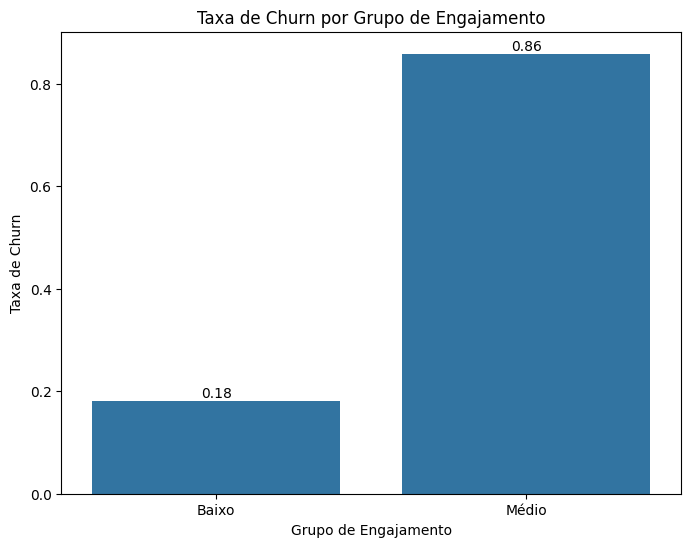

In [133]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calcular a taxa de churn para cada grupo de engajamento
churn_rate_by_engagement = df.groupby('EngagementGroup')['Exited'].mean()

# Criar o gráfico de barras
plt.figure(figsize=(8, 6))
ax = sns.barplot(x=churn_rate_by_engagement.index, y=churn_rate_by_engagement.values)
plt.title('Taxa de Churn por Grupo de Engajamento')
plt.xlabel('Grupo de Engajamento')
plt.ylabel('Taxa de Churn')
plt.gca().set_xticklabels(['Baixo', 'Médio', 'Alto'])

# Adicionar rótulos de dados
# Instead of looping through ax.patches, directly call bar_label on the container (ax.containers[0])
ax.bar_label(ax.containers[0], fmt='%.2f', label_type='edge')

plt.show()

In [149]:
import pandas as pd
from sklearn.cluster import KMeans

# Definir os pesos para cada variável
w1 = 0.15  # Peso de exemplo para IsActiveMember
w2 = 0.15 # Peso de exemplo para Tenure
w3 = 0.1 # Peso de exemplo para Point_Earned
w4 = 0.2  # Peso de exemplo para Satisfaction_Score
w5 = 0.2  # Peso de exemplo para NumOfProducts
w6 = 0.2 # Peso de exemplo para Balance

# Criar o índice de engajamento
df['EngagementIndex'] = (
    w1 * df['IsActiveMember']
    + w2 * df['Tenure']
    + w3 * df['Point Earned']
    + w4 * df['Satisfaction Score']
    + w5 * df['NumOfProducts']
    + w6 * df['Balance']
)

# Segmentar os clientes usando K-Means
kmeans = KMeans(n_clusters=3, random_state=0)
df['EngagementGroup'] = kmeans.fit_predict(df[['EngagementIndex']])

# Renomear os grupos para melhor interpretação
group_names = {0: 'Baixo', 1: 'Médio', 2: 'Alto'}
df['EngagementGroup'] = df['EngagementGroup'].map(group_names)

In [150]:
# Calcular a taxa de churn para cada grupo de engajamento
churn_rate_by_engagement = df.groupby('EngagementGroup')['Exited'].mean()

print(churn_rate_by_engagement)

EngagementGroup
Alto     0.239423
Baixo    0.240064
Médio    0.142315
Name: Exited, dtype: float64


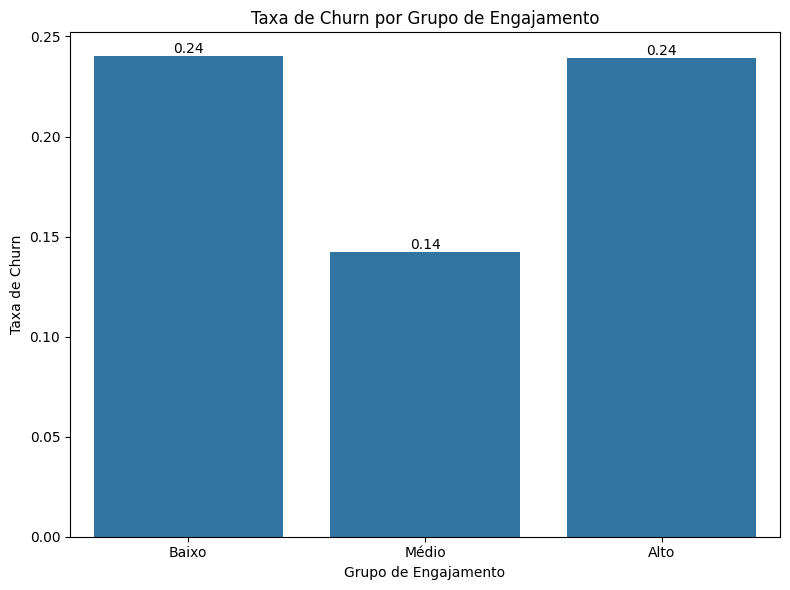

In [155]:
# Criar o gráfico de barras
plt.figure(figsize=(8, 6))  # Ajustar o tamanho da figura conforme necessário
ax = sns.barplot(x=churn_rate_by_engagement.index, y=churn_rate_by_engagement.values,
order=['Baixo', 'Médio', 'Alto']) # Define a ordem das barras
plt.title('Taxa de Churn por Grupo de Engajamento')
plt.xlabel('Grupo de Engajamento')
plt.ylabel('Taxa de Churn')

# Adicionar rótulos de dados acima das barras
for container in ax.containers:
    ax.bar_label(container, fmt='%.2f', label_type='edge')

plt.tight_layout()  # Ajustar o layout para melhor espaçamento
plt.show()